In [24]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [25]:
import pandas as pd
import simulation as sim
import control as control

In [26]:
clock = sim.Model("clock", control.Clock())
world = sim.Simulation(clock)
clock.bind()
clock.connect("time", world.get("time"))
clock.init()
clock.setparam('frequency',0.21)

In [27]:
clock.getallparams()

{'clock': 0.0, 'frequency': 0.21}

In [28]:
sym = pd.DataFrame(world.simulate(0.0,40.0,0.0001))

In [29]:
sym

,time,clock
0,0.0000,0.000000
1,0.0001,4.761905
2,0.0002,4.761905
3,0.0003,4.761905
4,0.0004,4.761905
...,...,...
399995,39.9995,42.857143
399996,39.9996,42.857143
399997,39.9997,42.857143
399998,39.9998,42.857143


<IPython.core.display.Javascript object>


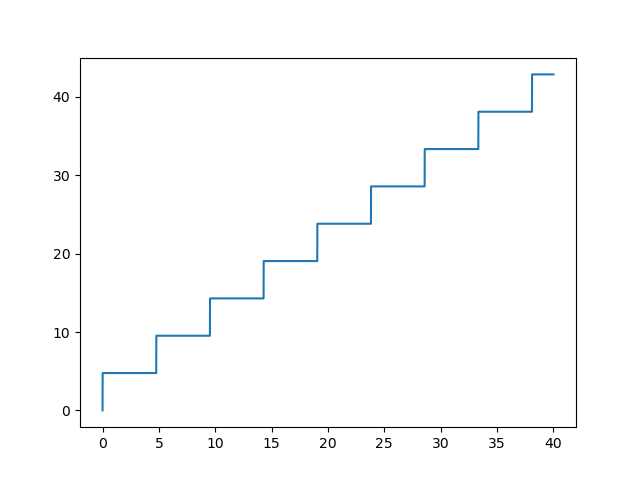

In [30]:
plt.plot(sym[['time']],sym[['clock']])